In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import ml_rfi.CNN_Program as rp
import ml_rfi.hera_qm.hera_qm.xrfi as xr
from ml_rfi.CNN_Program import Predictor
import numpy as np
from pyuvdata import UVData

In [3]:
h1c_data = "/lustre/aoc/projects/hera/H1C_IDR2/2458098/zen.2458098.37904.HH.uvh5"
tf_model = "/lustre/aoc/projects/hera/plaplant/machine_learning/models/AmpPhsv9SimRealv9_64BSizeDynamicVis/model_1600.ckpt"
uvd = UVData()
p = Predictor(uvd, h1c_data, tf_model)

In [4]:
wfs = p.pick_antennas()
p.make_prediction()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.average_pooling2d instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /lustre/aoc/projects/hera/plaplant/machine_learning/models/AmpPhsv9SimRealv9_64BSizeDynamicVis/model_1600.ckpt


invalid value encountered in log10


Complete


divide by zero encountered in log10


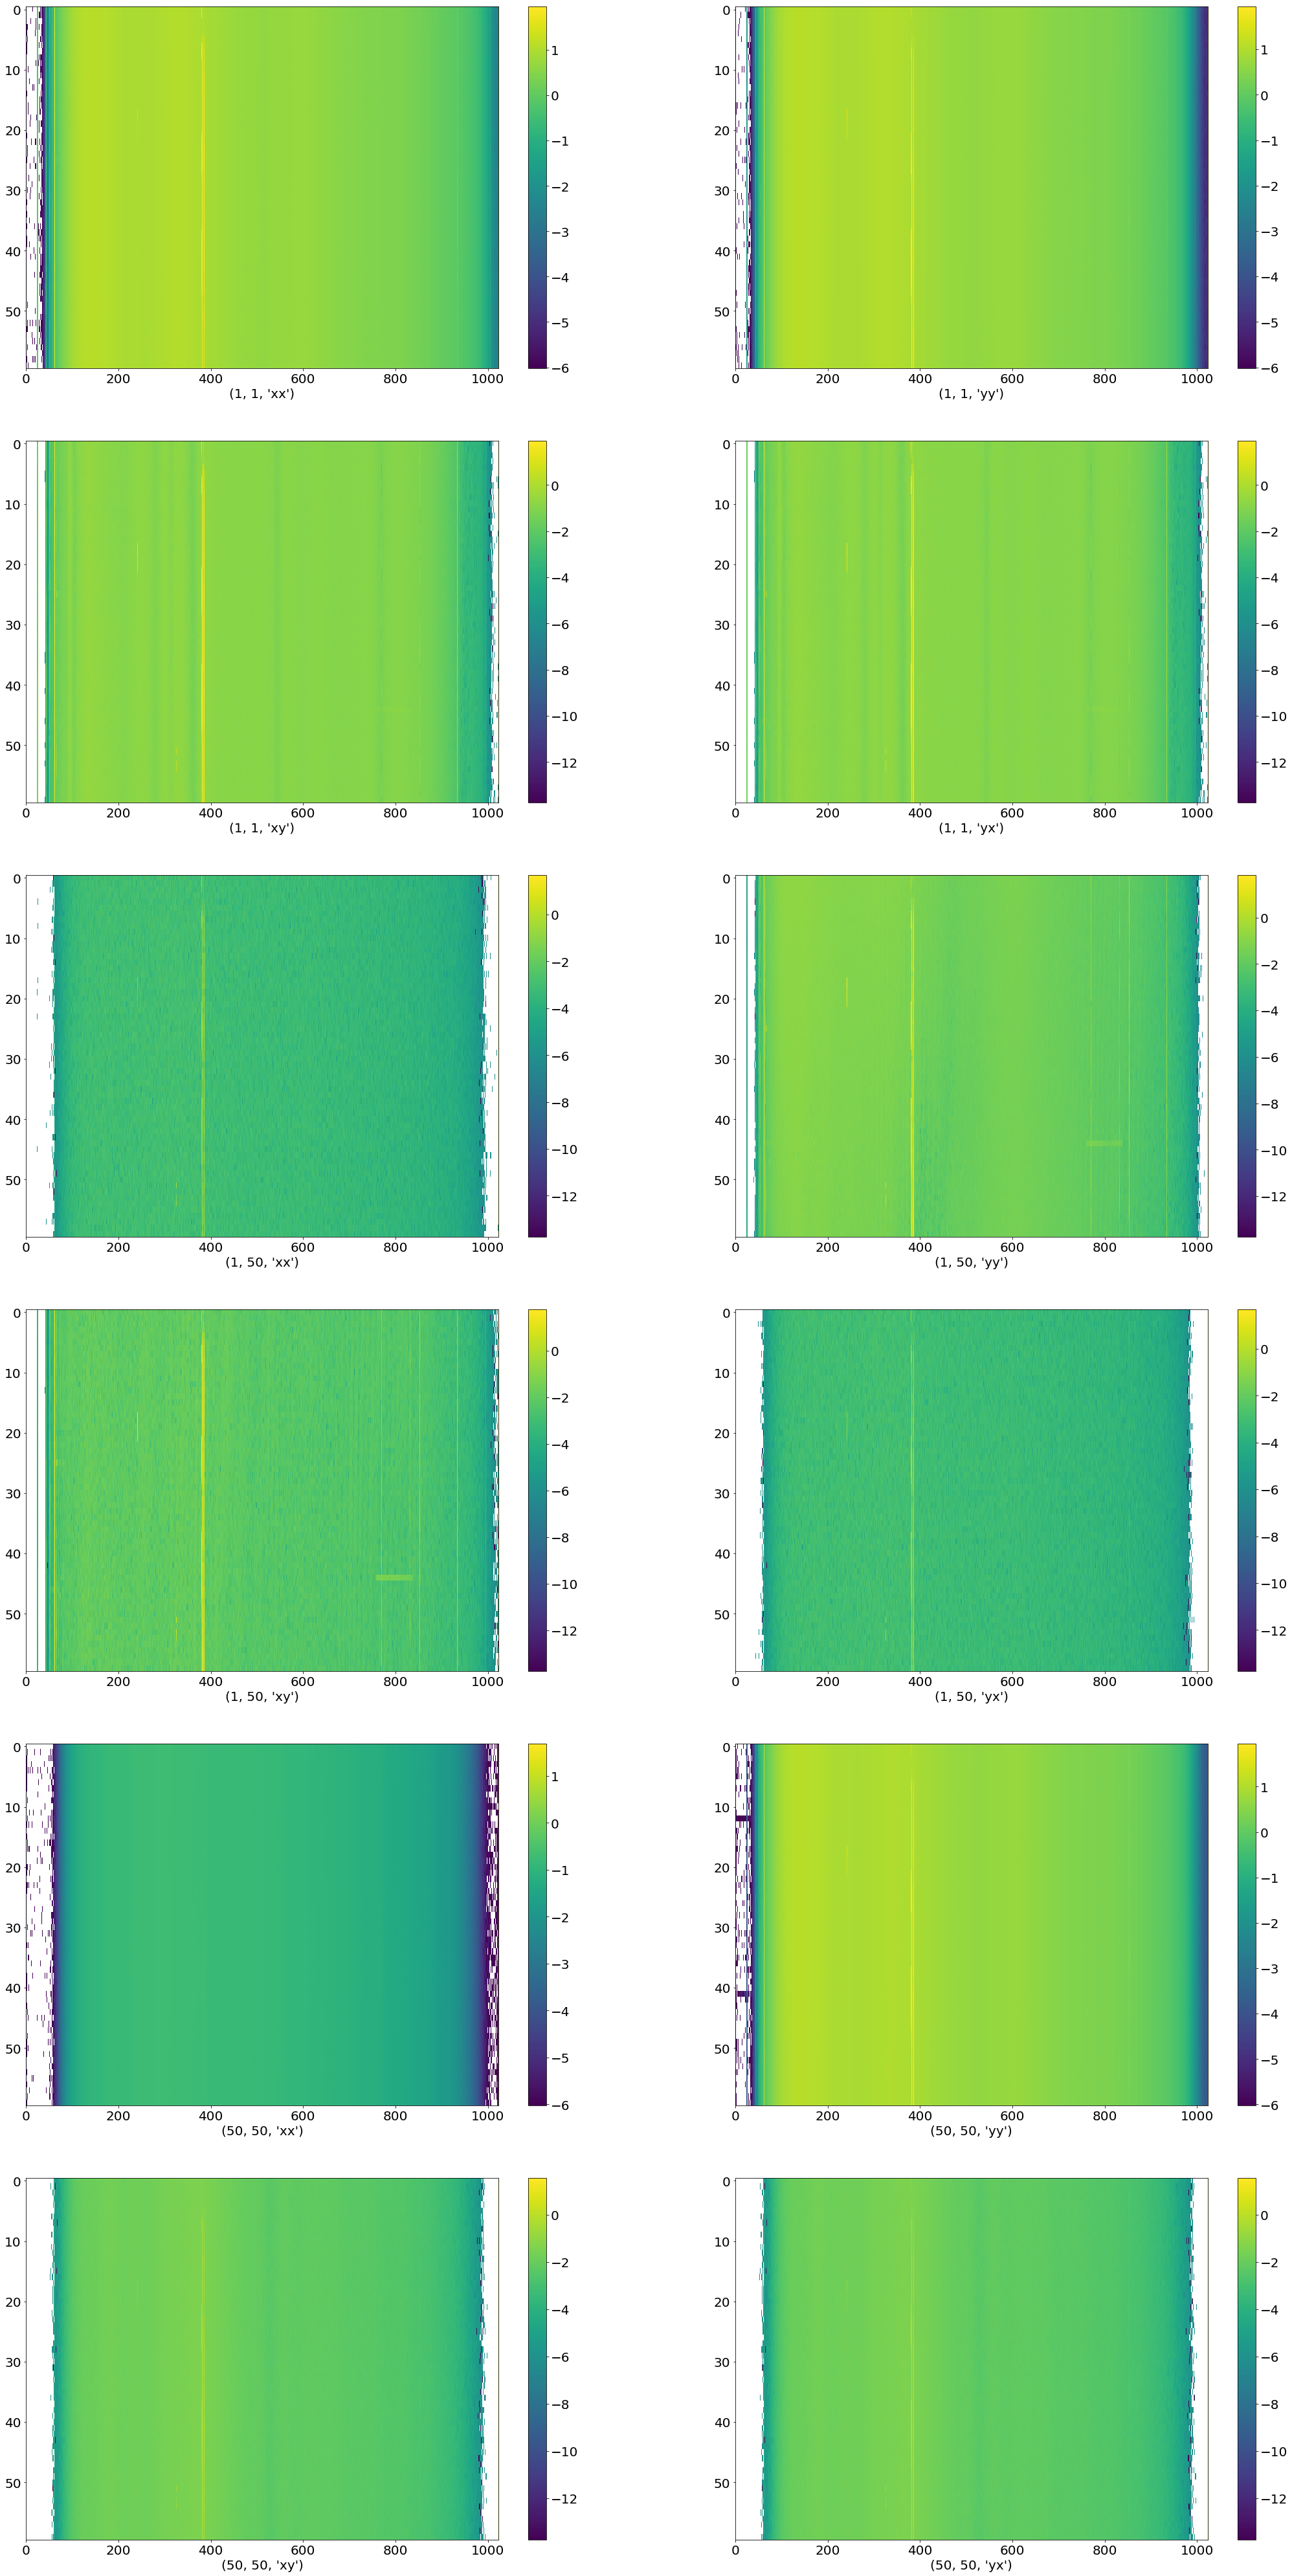

In [5]:
#xr.flag_xants(uvd, [0])
#data = uvd.get_data(1, 50, 'xy')
rp.visualize_input(uvd)

In [7]:
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(6*len(wfs), 30*len(wfs)))
in_counter = 0
out_counter = 0

for i in range(2*len(wfs)):
    if (i % 2 == 0):
        plt.subplot(len(wfs), 2, i+1)
        plt.imshow(np.log10(np.abs(wfs[in_counter, 1]) *np.logical_not(uvd.get_flags(wfs[in_counter, 0], force_copy = True))), aspect='auto',vmin=-4,vmax=0.)
        plt.xlabel(wfs[in_counter, 0])
        plt.colorbar()
        in_counter += 1
    
    else:
        plt.subplot(len(wfs), 2, i+1)
        plt.imshow(np.log10(np.abs(wfs[out_counter, 1]) *np.logical_not(xr.xrfi_waterfall(wfs[out_counter, 1]))), aspect='auto',vmin=-4,vmax=0.)
        plt.xlabel(wfs[out_counter, 0])
        plt.colorbar()
        out_counter += 1
                

divide by zero encountered in log10
divide by zero encountered in log10


In [1]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(3*len(wfs), 8*len(wfs)))
iterator = uvd.antpairpol_iter()
counter = 0
for key, data in iterator:
    plt.subplot(len(wfs)/2, 2, counter+1)
    plt.imshow(np.log10(np.abs(data) *np.logical_not(xr.xrfi_waterfall(data))), aspect='auto',vmin=-4,vmax=0.)
    plt.xlabel(key)
    plt.colorbar()
    counter += 1

NameError: name 'plt' is not defined